In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [2]:
base_dir = os.getcwd()
exec_dir = '..'

In [3]:
sizes = [int(x) for x in np.linspace(1000, 100000, 25)]
print(sizes)

[1000, 5125, 9250, 13375, 17500, 21625, 25750, 29875, 34000, 38125, 42250, 46375, 50500, 54625, 58750, 62875, 67000, 71125, 75250, 79375, 83500, 87625, 91750, 95875, 100000]


# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.

In [10]:
# Test the implementation.

capacity = 100
ntrials = 20
output_file1 = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file1, 'w')

os.chdir(exec_dir)

for m in sizes:
    print('Testing m={}...'.format(m))
    input_file = "{}/data/crash_data_{}.csv".format(base_dir, m)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[5].split(':'))[1])
    avg /= ntrials
    #print('Average time (us): {}'.format(avg))
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

print('Done!')

Testing m=1000...


FileNotFoundError: [Errno 2] No such file or directory: './TestIndex'

In [5]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file1, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,1000,0.921
1,5125,3.884
2,9250,6.940
3,13375,10.541
4,17500,13.830
5,21625,17.139
6,25750,20.074
7,29875,23.721
8,34000,27.070
9,38125,29.923


In [6]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &   time \\
\midrule
  1000 &  0.921 \\
  5125 &  3.884 \\
  9250 &  6.940 \\
 13375 & 10.541 \\
 17500 & 13.830 \\
 21625 & 17.139 \\
 25750 & 20.074 \\
 29875 & 23.721 \\
 34000 & 27.070 \\
 38125 & 29.923 \\
 42250 & 33.853 \\
 46375 & 37.420 \\
 50500 & 40.956 \\
 54625 & 44.705 \\
 58750 & 48.109 \\
 62875 & 51.303 \\
 67000 & 54.381 \\
 71125 & 57.947 \\
 75250 & 60.761 \\
 79375 & 64.179 \\
 83500 & 69.402 \\
 87625 & 72.203 \\
 91750 & 75.930 \\
 95875 & 79.350 \\
100000 & 83.109 \\
\bottomrule
\end{tabular}



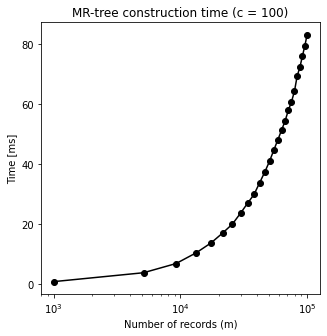

In [11]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree construction time (c = 100)")
plt.xscale('log')
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test-construction.eps".format(base_dir), format='eps', bbox_inches='tight')

# Construction test 2

We fix the number of records $m$ and change the capacity $c$.

In [4]:
m = 30000
n_trials = 20
input_file2 = '{}/data/crash_data_{}.csv'.format(base_dir, m)
output_file2 = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)
capacities = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
#capacities = list(range(10, 250, 10))
print(capacities)

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [7]:
# Test the implementation.

f = open(output_file2, 'w')
f.write('c,leaves,height,avg_time\n')

os.chdir(exec_dir)

for c in capacities:
    print('Testing c={}...'.format(c))
    avg_time, leaves, height = 0, 0, 0
    for i in range(0, n_trials):
        p = subprocess.run(['./TestIndex', input_file2, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg_time += int((lines[0].split(':'))[1])
        leaves += int((lines[1].split(':'))[1])
        height += int((lines[2].split(':'))[1]) 
    avg_time /= n_trials
    leaves /= n_trials
    height /= n_trials
    f.write('{},{},{},{}\n'.format(c, leaves, height, avg_time))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=4...
Testing c=8...
Testing c=16...
Testing c=32...
Testing c=64...
Testing c=128...
Testing c=256...
Testing c=512...
Testing c=1024...
Testing c=2048...
Done!


In [8]:
# Print the results.
df2 = pd.read_csv(output_file2)
# Divide by 1000 to convert microseconds to milliseconds.
df2['avg_time'] /= 1000
# Round the execution times to 3 decimal places.
df2 = df2.round({'avg_time': 3})
# Convert leaves and height columns to integer type.
df2 = df2.astype({'leaves': int, 'height': int})
print(df2.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   c &  leaves &  height &  avg\_time \\
\midrule
   4 &    7500 &       7 &    20.612 \\
   8 &    3750 &       4 &    13.980 \\
  16 &    1875 &       3 &    11.128 \\
  32 &     938 &       2 &    10.452 \\
  64 &     469 &       2 &    10.000 \\
 128 &     235 &       2 &    10.259 \\
 256 &     118 &       1 &     9.987 \\
 512 &      59 &       1 &    10.580 \\
1024 &      30 &       1 &    10.339 \\
2048 &      15 &       1 &    10.099 \\
\bottomrule
\end{tabular}



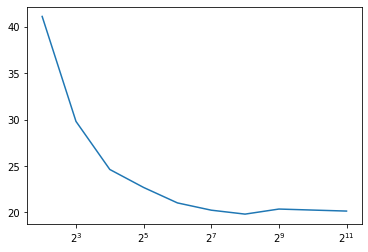

In [11]:
plt.xscale('log', base=2)
plt.plot(df2['c'], df2['avg_time'])

In [18]:
np.mean(df2['avg_time'])

8.040566666666665